# Figure Generation for Manuscript

## Overview
This notebook outlines the **SAFE-based generation and comparative analysis** of **Supplementary Figures S3, S4, and S5** for the manuscript. Detailed steps, including data processing, visualization parameters, and export settings, are included to ensure reproducibility.

---

## **Supplementary Figure S3: Comparative Analysis of the Pruned Yeast PPI Network Using RISK and SAFE**
### Description
Supplementary Figure S3 presents a comparative analysis of **RISK and SAFE** applied to a **pruned yeast protein–protein interaction (PPI) network**. The network was filtered to retain proteins with **≥6 interactions**, yielding a core subgraph of **2,059 nodes and 27,690 edges**.

- **(A)** Pruned PPI network layout.
- **(B)** RISK identified **68 GO BP clusters** using the **Louvain algorithm**.
- **(C)** SAFE identified **48 GO BP clusters** using the **shortest-path algorithm**.
- **(D)** Quantitative comparison of clustering metrics:

RISK showed:
- **Higher compactness** (*P < 0.01*)
- **Slightly higher silhouette score** (0.28 vs. 0.24)

Statistical test: **Mann–Whitney U**

### Generation Steps
1. Load the **pruned yeast PPI network**.
2. Apply **RISK** and extract 68 Louvain-based clusters.
3. Apply **SAFE** and extract 48 shortest-path-based clusters.
4. Compute **compactness** and **silhouette** scores for comparison.
5. Export high-resolution figure panels (**SVG, PNG**) for submission.

---

## **Supplementary Figure S4: Comparative Analysis of the Yeast GI Network Using RISK and SAFE**
### Description
Supplementary Figure S4 compares **RISK and SAFE** on the **yeast genetic interaction (GI) network** from Costanzo et al. (2016), consisting of **3,641 nodes and 23,562 edges**, unmodified to preserve original topology.

- **(A)** GI network layout.
- **(B)** RISK identified **24 GO BP clusters** using the **Louvain algorithm**.
- **(C)** SAFE identified **25 GO BP clusters** using the **shortest-path algorithm**.
- **(D)** Quantitative comparison of clustering metrics:

RISK exhibited:
- **Higher compactness** (*P < 0.0001*)
- **Better cluster separation** (*P < 0.05*)
- **Higher silhouette score** (0.41 vs. 0.18)

Statistical test: **Mann–Whitney U**

### Generation Steps
1. Load the **yeast GI network**.
2. Apply **RISK** and extract 24 Louvain-based clusters.
3. Apply **SAFE** and extract 25 shortest-path-based clusters.
4. Compute **compactness**, **separation**, and **silhouette** scores.
5. Export comparative panels in **SVG and PNG** formats.

---

## **Supplementary Figure S5: Comparative Analysis of the Full Yeast PPI Network Using RISK and SAFE**
### Description
Supplementary Figure S5 compares **RISK and SAFE** on the **largest connected subgraph** of the yeast PPI network from Michaelis et al. (2023), comprising **3,839 nodes and 30,955 edges**.

- **(A)** Full yeast PPI layout.
- **(B)** RISK identified **65 GO BP clusters** using the **Louvain algorithm**.
- **(C)** SAFE identified **36 GO BP clusters** using the **shortest-path algorithm**.
- **(D)** Quantitative comparison of clustering metrics:

RISK exhibited:
- **Higher compactness** (*P < 0.0001*)
- **Slightly higher silhouette score** (0.35 vs. 0.32)

Statistical test: **Mann–Whitney U**

### Generation Steps
1. Load the **full yeast PPI network**.
2. Apply **RISK** and extract 65 Louvain-based clusters.
3. Apply **SAFE** and extract 36 shortest-path-based clusters.
4. Compare clustering metrics (**compactness**, **silhouette**).
5. Export final figures in **SVG and PNG** formats.

---

## Workflow
- **Input Data**: Pruned yeast PPI network, yeast GI network, full yeast PPI network; RISK and SAFE clustering outputs.
- **Tools Used**: Python, RISK, SAFE, NetworkX, Matplotlib/Seaborn.
- **Output**: High-resolution figures for **Supplementary Figures S3, S4, and S5**.


In [1]:
# First, load the Costanzo et al., 2016 network

import matplotlib.pyplot as plt
import pandas as pd
import json


from safepy import safe

%matplotlib inline

In [2]:
## Parameters

path_to_safe_data = "./"  # path to the cloned safe-data repository (https://github.com/baryshnikova-lab/safe-data.git)

In [3]:
# Common function definitions


def read_json(file_path):
    with open(file_path, "r") as file:
        return json.load(file)


def write_json(data, filename):
    with open(filename, "w") as file:
        json.dump(data, file, indent=4)

# Supplementary Figure S3

## SAFE annotation of the trimmed yeast PPI network (Michaelis et al., 2023)


In [4]:
## Initialize the safe object
 
sf_ppi = safe.SAFE()

In [5]:
# Load Cytoscape session file

sf_ppi.load_network(
    network_file="./data/cytoscape/michaelis_2023_full_new.cys",
    node_key_attribute="label",  # i.e., node labels
)

Loading network from ./data/cytoscape/michaelis_2023_full_new.c.cys
Loading the cys file ./data/cytoscape/michaelis_2023_full_new.c.cys...
Loading the view: CytoscapeSession-2025_09_05-11_55/views/2297687-2471761-michaelis_2023.graphml.xgmml
Loading the first network: CytoscapeSession-2025_09_05-11_55/networks/2297646-michaelis_2023.graphml.xgmml
Calculating edge lengths...


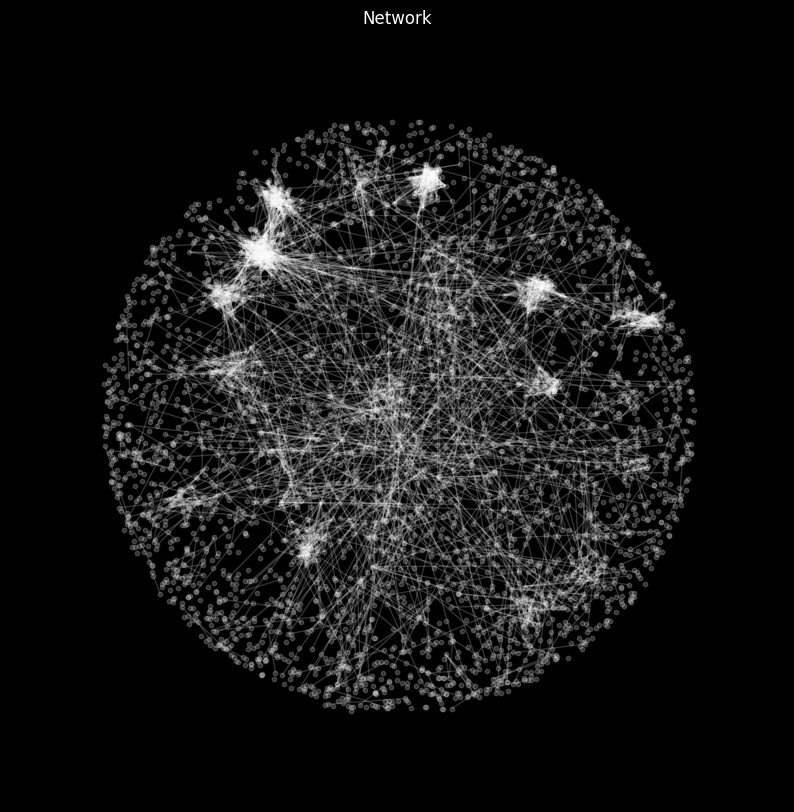

In [6]:
# View network as exported by Cytoscape

sf_ppi.plot_network()
plt.show()

## Build SAFE-compatible annotation file from JSON file

In [7]:
import tarfile
import os


def build_attributes_tar_file_from_dict(d, export_path, min_genes=5, max_genes=75):
    """
    Build an attributes tar.gz file from a dictionary mapping terms -> gene lists.
    """
    # Filter dictionary to only include terms with gene list sizes in [min_genes, max_genes]
    filtered_d = {
        term: genes_list
        for term, genes_list in d.items()
        if min_genes <= len(genes_list) <= max_genes
    }

    # Collect unique genes across filtered terms
    genes = sorted(set(gene for genes_list in filtered_d.values() for gene in genes_list))

    # Build header and rows
    header = ["ORF"] + list(filtered_d.keys())
    rows = []
    for gene in genes:
        row = [gene]
        for term, genes_list in filtered_d.items():
            row.append("1" if gene in genes_list else "0")
        rows.append(row)

    # Write output text file
    output_file = "output_file.txt"
    with open(output_file, "w") as file:
        file.write("\t".join(header) + "\n")
        for row in rows:
            file.write("\t".join(row) + "\n")

    # Tar and gzip the file
    with tarfile.open(export_path, "w:gz") as tar:
        tar.add(output_file)

    # Cleanup
    os.remove(output_file)

In [8]:
# Load the recent GO BP annotation from JSON and convert it into the text format

import json


with open("./data/json/annotations/go_biological_process.json", "r") as file:
    go_bp_json = json.load(file)

build_attributes_tar_file_from_dict(
    go_bp_json,
    "./data/tar.gz/annotations/go_biological_process.tar.gz",
    min_genes=5,
    max_genes=75,
)
print(f"Text successfully written and compressed")

Text successfully written and compressed


## Load attributes in the SAFE object

In [9]:
# Now load the attributes...

sf_ppi.load_attributes(attribute_file="./data/tar.gz/annotations/go_biological_process.tar.gz")

Loading attributes from ./data/tar.gz/annotations/go_biological_process.tar.gz


In [32]:
# Explicitly define the node_distance metric and the neighborhood radius

sf_ppi.define_neighborhoods(
    node_distance_metric="shortpath_weighted_layout", neighborhood_radius=0.05
)

Node distance metric: shortpath_weighted_layout
Neighborhood definition: 0.05 x diameter
Number of nodes per neighborhood (mean +/- std): 12.50 +/- 22.75


In [33]:
# Go ahead and compute statistical significance of the neighborhoods

sf_ppi.enrichment_type = "permutation"
sf_ppi.enrichment_threshold = 0.01
sf_ppi.compute_pvalues(processes=1, num_permutations=1_000)

Current settings (possibly overwriting global ones):
	processes=1
	num_permutations=1000
Using randomization to calculate enrichment...


100%|████████████████████████████████████████████████████████████████| 1000/1000 [04:15<00:00,  3.91it/s]


In [34]:
# Define top attributes

sf_ppi.define_top_attributes()

Criteria for top attributes:
- minimum number of enriched neighborhoods: 10
- region-specific distribution of enriched neighborhoods as defined by: connectivity
Number of top attributes: 32


In [35]:
# Determine clustering threshold and trim domains

sf_ppi.define_domains(attribute_distance_threshold=0.001)
sf_ppi.trim_domains()

Number of domains: 30 (containing 1-2 attributes)
Removed 11 domains because they were the top choice for less than 10 neighborhoods.


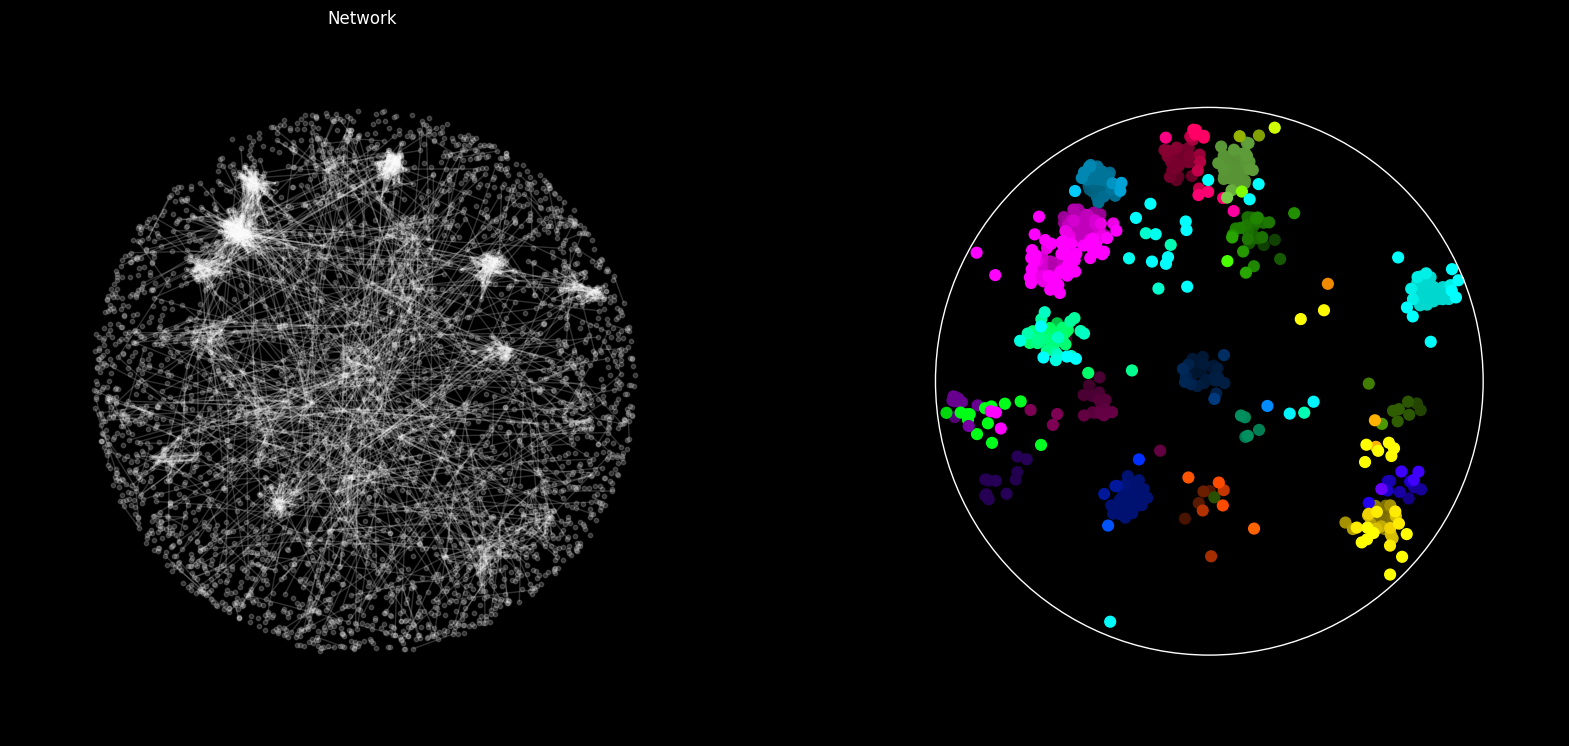

In [36]:
# Plot network

sf_ppi.plot_composite_network(show_each_domain=False, show_domain_ids=False, labels=[])

# Save the figure
# plt.savefig('./png/publication/safe_michaelis_2023.png', facecolor="black", dpi=350)

## Now export the domain information for head-to-head comparison in the RISK notebook

`risk-examples/fig_1_supp_fig_1.ipynb`

In [37]:
import networkx as nx

# Total number of nodes
N = len(sf_ppi.graph.nodes)

# Build reversed mapping: 0..N-1 mapped to labels of nodes from back to front
node_order = list(sf_ppi.graph.nodes)           # graph iteration order
labels = nx.get_node_attributes(sf_ppi.graph, "label")

# Reverse map (optional: still available if you need 0..N-1 -> label)
reversed_map = {
    i: labels[node_order[j]]
    for i, j in enumerate(range(N - 1, -1, -1))
}

# Create DataFrame
ppi_domain_df = sf_ppi.node2domain.copy()

# Adjusting the logic to store the node label instead of the row index
ppi_domain_dict = {}

for index, row in ppi_domain_df.iterrows():
    primary_domain = int(row["primary_domain"])

    if primary_domain not in ppi_domain_dict:
        ppi_domain_dict[primary_domain] = []

    # Get node label for this row index
    label = labels.get(index, str(index))  # fallback to index if label missing
    ppi_domain_dict[primary_domain].append(label)

# Export as JSON for further analysis
write_json(ppi_domain_dict, "./data/json/domains/20250904_safe_domains_michaelis_2023_kcore6.json")

# Supplementary Figure S2

## SAFE annotation of the Yeast genetic interaction network (Costanzo et al., 2016)

In [17]:
## import safepy package
import matplotlib.pyplot as plt
import pandas as pd

from safepy import safe

%matplotlib inline

## First, we have to map ORFs to standard gene names in the Costanzo network

In [18]:
## Initialize the safe object

sf_gi = safe.SAFE()

In [2]:
# Let's map standard gene names to the ORF node labels...

# Now manipulate the Costanzo network for it to be workable with standard gene names
import json
import pickle


def read_gpickle(filepath):
    with open(filepath, "rb") as f:
        G = pickle.load(f)
    return G


def write_gpickle(graph, filepath):
    with open(filepath, "wb") as file:
        pickle.dump(graph, file)


# Load ORF to standard gene name mapping dict
def read_json(file_path):
    with open(file_path, "r") as file:
        return json.load(file)


# Load the mapping dictionary
sys_gene_to_std_gene_map = read_json("./data/json/sgd/sys_gene_to_std_gene_map.json")
costanzo_network_path = "./data/gpickle/Costanzo_Science_2016.gpickle"
costanzo_gpickle = read_gpickle(costanzo_network_path)

# Update the 'label' attribute for each node based on 'label_orf'
for node_id, data in costanzo_gpickle.nodes(data=True):
    if "label_orf" in data:
        # Update 'label' using the mapping, if it exists; otherwise, keep the current 'label_orf'
        data["label_orf"] = sys_gene_to_std_gene_map.get(data["label_orf"], data["label_orf"])

write_gpickle(costanzo_gpickle, "./data/gpickle/costanzo_2016_std_names.gpickle")

# Display nodes to confirm attributes are removed
# list(costanzo_network_relabeled.nodes(data=True))

## Now, we can begin to annotate the network

Loading network from ./data/gpickle/costanzo_2016_std_names.gpickle


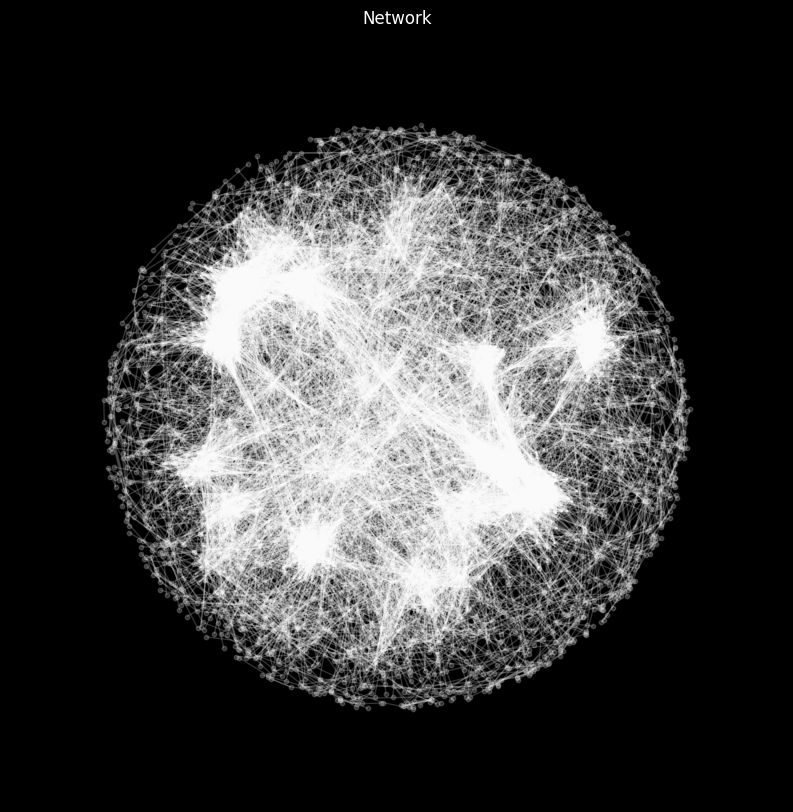

In [107]:
## Initialize the safe object again

sf_gi = safe.SAFE()

# Load Cytoscape session file
sf_gi.load_network(
    network_file="./data/gpickle/costanzo_2016_std_names.gpickle",  # Metabolic FM network
)

# View network as exported by Cytoscape
sf_gi.plot_network()
plt.show()

In [108]:
# Now load the attributes...

sf_gi.load_attributes(attribute_file="./data/tar.gz/annotations/go_biological_process.tar.gz")

# Explicitly define the node_distance metric and the neighborhood radius
sf_gi.define_neighborhoods(
    node_distance_metric="shortpath_weighted_layout", neighborhood_radius=0.06
)

Loading attributes from ./data/tar.gz/annotations/go_biological_process.tar.gz
Node distance metric: shortpath_weighted_layout
Neighborhood definition: 0.06 x diameter
Number of nodes per neighborhood (mean +/- std): 16.09 +/- 27.30


In [109]:
# Go ahead and compute statistical significance of the neighborhoods

sf_gi.enrichment_type = "permutation"
sf_gi.compute_pvalues(processes=1, num_permutations=1_000)

Current settings (possibly overwriting global ones):
	processes=1
	num_permutations=1000
Using randomization to calculate enrichment...


100%|████████████████████████████████████████████████████████████████| 1000/1000 [10:52<00:00,  1.53it/s]


In [111]:
# Define top attributes

sf_gi.define_top_attributes()

Criteria for top attributes:
- minimum number of enriched neighborhoods: 10
- region-specific distribution of enriched neighborhoods as defined by: connectivity
Number of top attributes: 172


In [112]:
# Try to match RISK's group count

sf_gi.define_domains(attribute_distance_threshold=0.54)
sf_gi.trim_domains()

Number of domains: 62 (containing 1-25 attributes)
Removed 38 domains because they were the top choice for less than 10 neighborhoods.


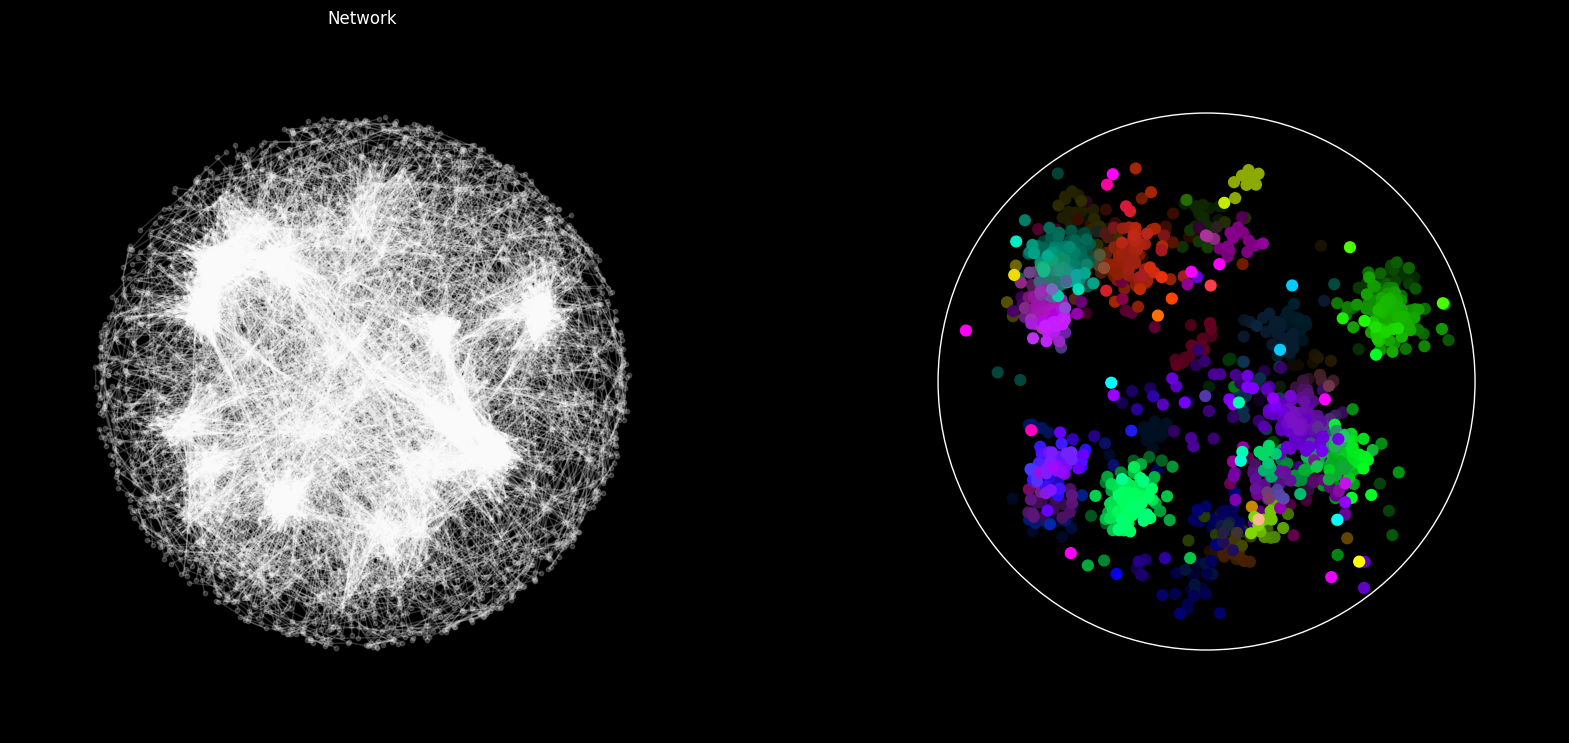

In [128]:
# Plot simplified composite network

sf_gi.plot_composite_network(show_each_domain=False, show_domain_ids=False, labels=[])

# Save the figure

# plt.savefig('./png/publication/safe_costanzo_2016.png', facecolor="black", dpi=350)

## Now export the domain information for head-to-head comparison in the RISK notebook

`risk-examples/supp_fig_2_3.ipynb`

In [133]:
# Create DataFrame

gi_domain_df = sf_gi.node2domain.copy()

# Adjusting the logic to store the row index instead of the node value
gi_domain_dict = {}

for index, row in gi_domain_df.iterrows():
    primary_domain = int(row["primary_domain"])

    if primary_domain not in gi_domain_dict:
        gi_domain_dict[primary_domain] = []

    # Store the row index instead of node value
    gi_domain_dict[primary_domain].append(index)

## Export as JSON for further analysis
# write_json(gi_domain_dict, './data/json/domains/20250130_safe_domains_costanzo_2016.json')

In [2]:
# Create a mapping of SAFE's node IDs to labels

# write_json(dict(zip(sf_gi.nodes['id'], sf_gi.nodes['key'])), './data/json/domains/20250130_safe_node_id_to_label_costanzo_2016.json')

# Supplementary Figure S2

## SAFE annotation of the full yeast PPI network (Michaelis et al., 2023)


In [116]:
## import safepy package
import matplotlib.pyplot as plt
import pandas as pd

from safepy import safe

%matplotlib inline

In [117]:
## Initialize the safe object

sf_fppi = safe.SAFE()

In [118]:
# Load Cytoscape session file

sf_fppi.load_network(
    network_file="./data/cytoscape/michaelis_2023_full.cys",
    node_key_attribute="label",  # i.e., node labels
)

Loading network from ./data/cytoscape/michaelis_2023_full.cys
Loading the cys file ./data/cytoscape/michaelis_2023_full.cys...
Loading the view: CytoscapeSession-2025_01_30-17_31/views/128-174202-michaelis_2023.graphml.xgmml
Loading the first network: CytoscapeSession-2025_01_30-17_31/networks/87-michaelis_2023.graphml.xgmml
Calculating edge lengths...


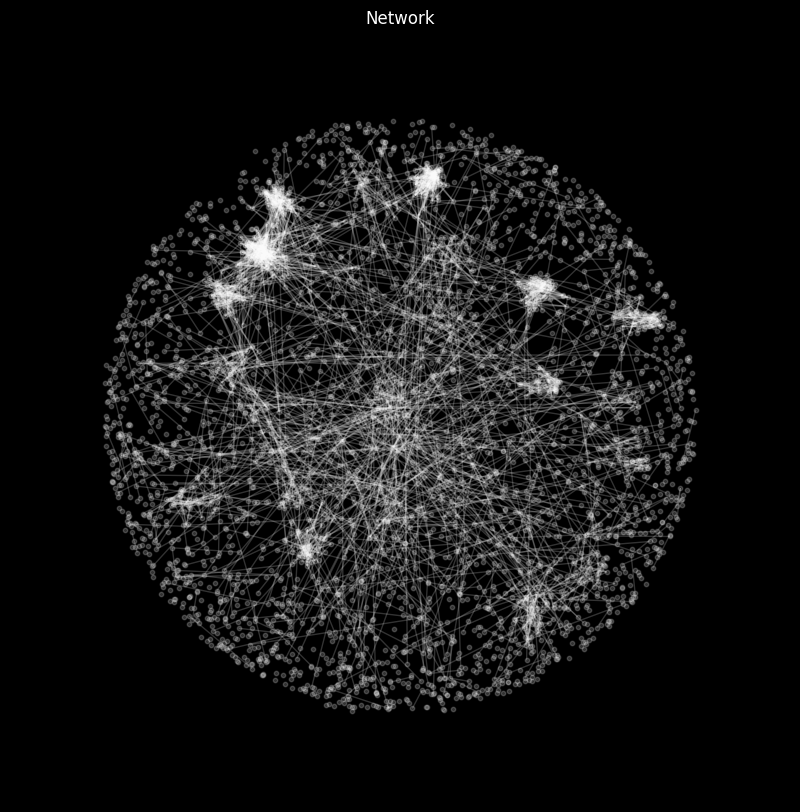

In [119]:
# View network as exported by Cytoscape

sf_fppi.plot_network()
plt.show()

In [120]:
# Now load the attributes...

sf_fppi.load_attributes(attribute_file="./data/tar.gz/annotations/go_biological_process.tar.gz")

Loading attributes from ./data/tar.gz/annotations/go_biological_process.tar.gz


In [121]:
# Explicitly define the node_distance metric and the neighborhood radius

sf_fppi.define_neighborhoods(
    node_distance_metric="shortpath_weighted_layout", neighborhood_radius=0.05
)

Node distance metric: shortpath_weighted_layout
Neighborhood definition: 0.05 x diameter
Number of nodes per neighborhood (mean +/- std): 12.50 +/- 22.75


In [122]:
# Go ahead and compute statistical significance of the neighborhoods

sf_fppi.enrichment_type = "permutation"
sf_fppi.enrichment_threshold = 0.05
sf_fppi.compute_pvalues(processes=1, num_permutations=1_000)

Current settings (possibly overwriting global ones):
	processes=1
	num_permutations=1000
Using randomization to calculate enrichment...


100%|████████████████████████████████████████████████████████████████| 1000/1000 [10:25<00:00,  1.60it/s]


In [124]:
# Define top attributes

sf_fppi.define_top_attributes()

Criteria for top attributes:
- minimum number of enriched neighborhoods: 10
- region-specific distribution of enriched neighborhoods as defined by: connectivity
Number of top attributes: 85


In [125]:
# Determine clustering threshold and trim domains

sf_fppi.define_domains(attribute_distance_threshold=0.01)
sf_fppi.trim_domains()

Number of domains: 79 (containing 1-4 attributes)
Removed 43 domains because they were the top choice for less than 10 neighborhoods.


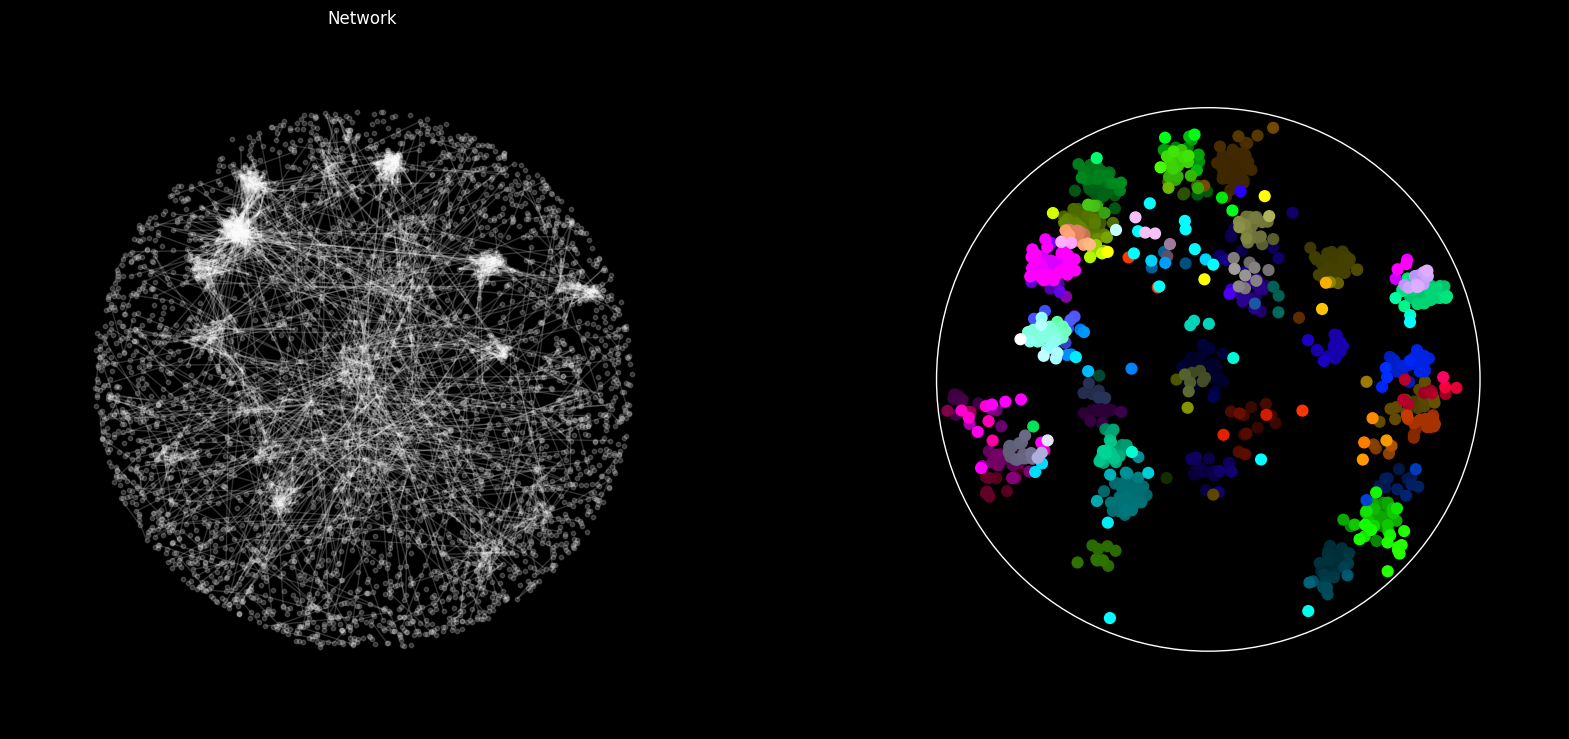

In [126]:
# Plot network

sf_fppi.plot_composite_network(show_each_domain=False, show_domain_ids=False, labels=[])

# Save the figure
# plt.savefig('./png/publication/safe_michaelis_2023_full.png', facecolor="black", dpi=350)

## Now export the domain information for head-to-head comparison in the RISK notebook


In [134]:
# Create DataFrame

fppi_domain_df = sf_fppi.node2domain.copy()

# NOTE: Different logic to map domains to nodes than PPI-slim and GI
# Unknown incompatibility between RISK and SAFE by node IDs - use gene names
fppi_domain_dict = {}
fppi_ids_to_labels_dict = dict(zip(sf_fppi.nodes["id"], sf_fppi.nodes["label"]))

for index, row in fppi_domain_df.iterrows():
    primary_domain = int(row["primary_domain"])
    if primary_domain not in fppi_domain_dict:
        fppi_domain_dict[primary_domain] = []

    # Store the row index instead of node value
    fppi_domain_dict[primary_domain].append(fppi_ids_to_labels_dict[index])

# ## Export as JSON for further analysis
# write_json(fppi_domain_dict, './data/json/domains/20250130_safe_domains_michaelis_2023_full.json')